In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Load data

In [2]:
df = pd.read_csv('../data/gefcom2014/preprocessed/gefcom2014-solar-preprocessed.csv', index_col=[0,1], header=[0,1])

FileNotFoundError: [Errno 2] File ../data/gefcom2014/preprocessed/gefcom2014-solar-preprocessed.csv does not exist: '../data/gefcom2014/preprocessed/gefcom2014-solar-preprocessed.csv'

In [14]:
print(len(df))

19704


## Analysis

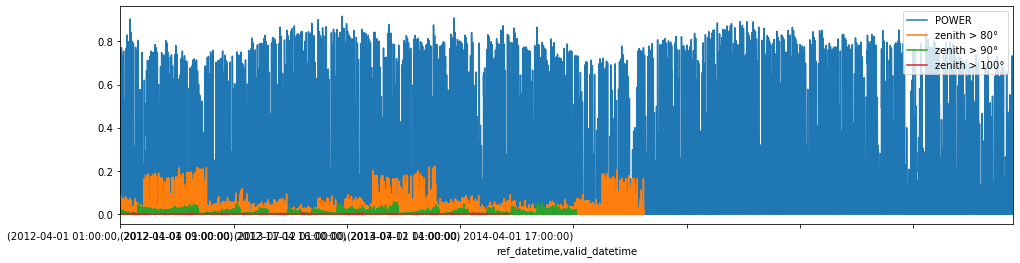

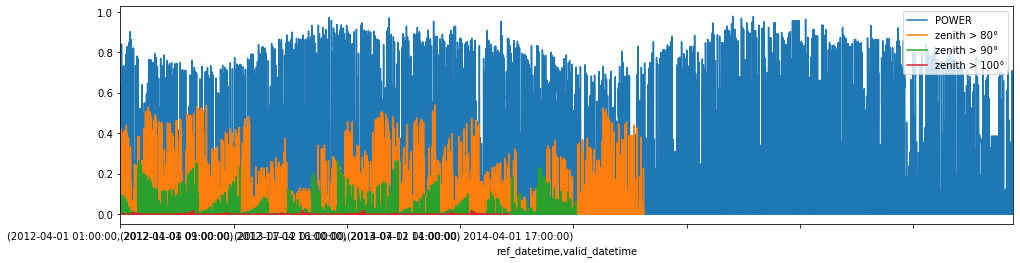

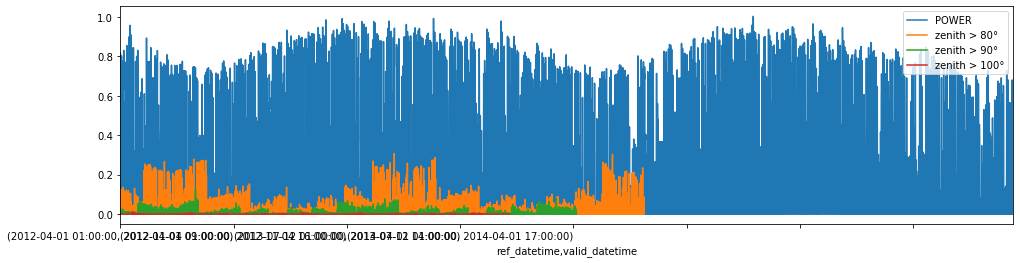

In [16]:
for farm in df.columns.levels[0]:
    fig, ax = plt.subplots(figsize=(16,4))
    df[farm]['POWER'].plot(ax=ax)
    df.loc[df.loc[:, (farm, 'zenith')] > 80, (farm, 'POWER')].plot(label='zenith > 80°', ax=ax)
    df.loc[df.loc[:, (farm, 'zenith')] > 90, (farm, 'POWER')].plot(label='zenith > 90°', ax=ax)
    df.loc[df.loc[:, (farm, 'zenith')] > 100, (farm, 'POWER')].plot(label='zenith > 100°', ax=ax)
    plt.legend()

In [17]:
for farm in df.columns.levels[0]:
    df.loc[df.loc[:, (farm, 'zenith')] > 100, (farm, slice(None))] = np.nan
df = df.dropna(how='all', axis=0)

In [18]:
print(len(df))

11106


## Conclusion

From the plots above, it is clear that there can be some non-negligible horison brightning when zenith ≈ 90°. Therefore, we choose the threshold for deciding when there will be night to be zenith > 100°.